### Importing all the required Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [23]:
# Set visualization style
sns.set(style="whitegrid")

### Load Data & Feature Reduction

In [24]:
# Loading the training dataset
df = pd.read_csv('train_data.csv')

In [25]:
df.head()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442
2,2,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,...,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034
3,3,0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406
4,4,0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858


In [26]:
df.tail()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5802,5802,0,0.507483,0.547263,0.553188,0.596448,0.596448,0.998991,0.797393,0.809318,...,0.800601,0.003993,0.625135,0.596443,0.840625,0.286153,0.028366,0.568173,1,0.018670
5803,5803,0,0.553795,0.636993,0.606671,0.648323,0.648323,0.999388,0.798010,0.809855,...,0.853261,0.000778,0.623890,0.648322,0.843620,0.277068,0.026821,0.565297,1,0.050788
5804,5804,0,0.491639,0.559693,0.541250,0.597003,0.597003,0.998981,0.797405,0.809327,...,0.814292,0.004849,0.623857,0.597002,0.841610,0.280399,0.026902,0.565636,1,0.027161
5805,5805,0,0.513626,0.573321,0.555758,0.646665,0.646665,0.999066,0.797506,0.809396,...,0.815617,0.000476,0.623845,0.646663,0.842716,0.287670,0.026791,0.565159,1,0.017685
5806,5806,0,0.537805,0.597253,0.582205,0.635178,0.635221,0.999249,0.797785,0.809621,...,0.836275,0.000496,0.624049,0.635173,0.842203,0.275796,0.026791,0.565158,1,0.097046


In [27]:
df.shape

(5807, 97)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    Operating Profit Rate                                    5807 non-null   float64
 8    Pre-tax net Inter

In [29]:
df.describe()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,...,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.0,5807.000000
mean,2903.000000,0.034097,0.505416,0.558893,0.553852,0.607958,0.607938,0.998726,0.797192,0.809081,...,0.807956,1.803513e+07,0.624030,0.607956,0.840407,0.280324,0.027446,0.565267,1.0,0.047736
std,1676.480838,0.181493,0.060808,0.065650,0.061613,0.017499,0.017480,0.014087,0.013731,0.014553,...,0.039062,3.706013e+08,0.009625,0.017499,0.015447,0.014511,0.011134,0.011678,0.0,0.049046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.224792,1.015560e-04,0.419045,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1451.500000,0.000000,0.476673,0.535679,0.527437,0.600448,0.600427,0.998969,0.797386,0.809312,...,0.796843,9.038045e-04,0.623634,0.600448,0.840121,0.276916,0.026791,0.565158,1.0,0.024395
50%,2903.000000,0.000000,0.503096,0.559911,0.552492,0.605969,0.605933,0.999022,0.797464,0.809376,...,0.810710,2.108343e-03,0.623879,0.605967,0.841176,0.278801,0.026808,0.565253,1.0,0.033687
75%,4354.500000,0.000000,0.535417,0.589212,0.583998,0.613856,0.613730,0.999094,0.797579,0.809469,...,0.826544,5.328774e-03,0.624169,0.613857,0.842352,0.281487,0.026914,0.565729,1.0,0.053393
max,5806.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,0.540672,0.736985,1.0,0.920638


In [30]:
df.isnull().sum()

Index                                                       0
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 97, dtype: int64

In [31]:
df['Bankrupt?'].value_counts(normalize=True)

Bankrupt?
0    0.965903
1    0.034097
Name: proportion, dtype: float64

/var/folders/jn/7q4k5xqj6tdc7t0t0_c17hrm0000gn/T/ipykernel_55783/2302745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=df, palette='viridis')


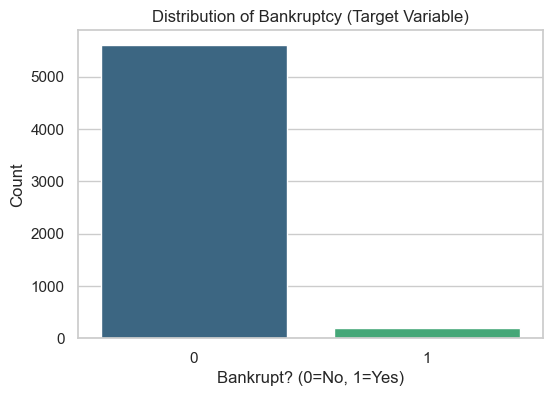

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Bankrupt?', data=df, palette='viridis')
plt.title('Distribution of Bankruptcy (Target Variable)')
plt.xlabel('Bankrupt? (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [33]:
# Separate Identifiers and Target
# We must drop 'Bankrupt?' and 'Index' for clustering but keep them for later use.
target = df['Bankrupt?']
indices = df['Index']
X = df.drop(columns=['Bankrupt?', 'Index'])

In [34]:
print(f"Original Data Loaded: {df.shape}")

Original Data Loaded: (5807, 97)


### Feature Reduction

In [35]:
# Performing Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1)
rf.fit(X, target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [36]:
# Get feature importances and pick the top 50
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_50_features = feature_importances.nlargest(50).index.tolist()

In [37]:
# Create the reduced dataset
X_reduced = X[top_50_features]
print(f"Features reduced from {X.shape[1]} to {X_reduced.shape[1]}")

Features reduced from 95 to 50


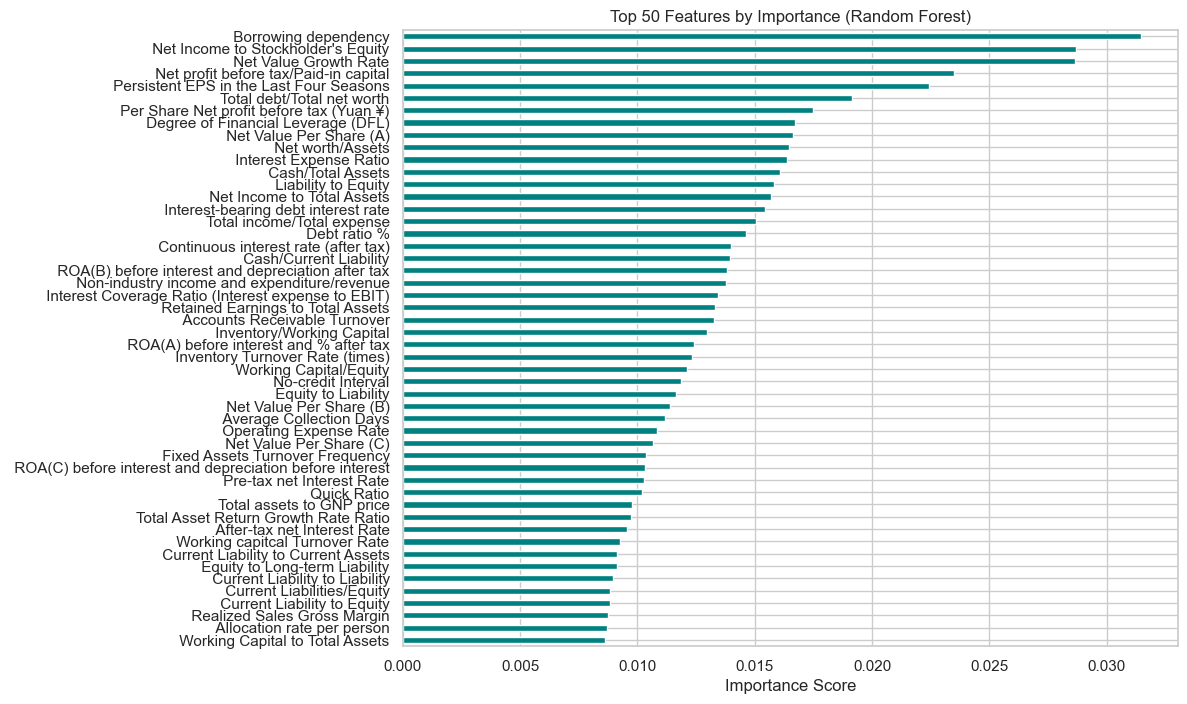

In [38]:
plt.figure(figsize=(10, 8))
top_20_plot = feature_importances.nlargest(50).sort_values(ascending=True)
top_20_plot.plot(kind='barh', color='teal')
plt.title('Top 50 Features by Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

### Standardization 

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

In [40]:
preprocessing_bundle = {'selected_features': top_50_features, 'scaler': scaler}
joblib.dump(preprocessing_bundle, 'team_preprocessing.joblib')
print(" Saved 'team_preprocessing.joblib'")

 Saved 'team_preprocessing.joblib'


### Clustering

In [41]:
TEAM_SIZE = 4
K_CLUSTERS = 7

In [42]:
# Clustering into {K_CLUSTERS} subgroups 

kmeans = KMeans(n_clusters=K_CLUSTERS, random_state=RANDOM_SEED, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [43]:
# Adding cluster labels back to the dataframe so we can split the data
df['Cluster_ID'] = cluster_labels

In [45]:
# Saving the clustering model 
joblib.dump(kmeans, 'team_cluster_model.joblib')
print("Saved 'team_cluster_model.joblib'")

Saved 'team_cluster_model.joblib'


### Save Subgropus & Reporting

In [46]:
# Subgroup Analysis

cluster_stats = []

for cluster_id in range(K_CLUSTERS):
    # Filter data for this cluster
    subgroup = df[df['Cluster_ID'] == cluster_id]
    
    # Calculate stats
    n_companies = len(subgroup)
    n_bankrupt = subgroup['Bankrupt?'].sum()
    prop_bankrupt = n_bankrupt / n_companies if n_companies > 0 else 0
    
    print(f"Cluster {cluster_id}: {n_companies} Companies | {n_bankrupt} Bankrupt ({prop_bankrupt:.2%})")
    print()
    cluster_stats.append({'Cluster': cluster_id, 'Bankrupt%': prop_bankrupt})
    print()
    
    # Saving files for Team Member
    file_name = f'cluster_{cluster_id}_train_data.csv'
    subgroup.to_csv(file_name, index=False)
    print(f" Created file: {file_name}")

Cluster 0: 2846 Companies | 63 Bankrupt (2.21%)


 Created file: cluster_0_train_data.csv
Cluster 1: 1693 Companies | 3 Bankrupt (0.18%)


 Created file: cluster_1_train_data.csv
Cluster 2: 1 Companies | 0 Bankrupt (0.00%)


 Created file: cluster_2_train_data.csv
Cluster 3: 1 Companies | 0 Bankrupt (0.00%)


 Created file: cluster_3_train_data.csv
Cluster 4: 536 Companies | 0 Bankrupt (0.00%)


 Created file: cluster_4_train_data.csv
Cluster 5: 727 Companies | 129 Bankrupt (17.74%)


 Created file: cluster_5_train_data.csv
Cluster 6: 3 Companies | 3 Bankrupt (100.00%)


 Created file: cluster_6_train_data.csv


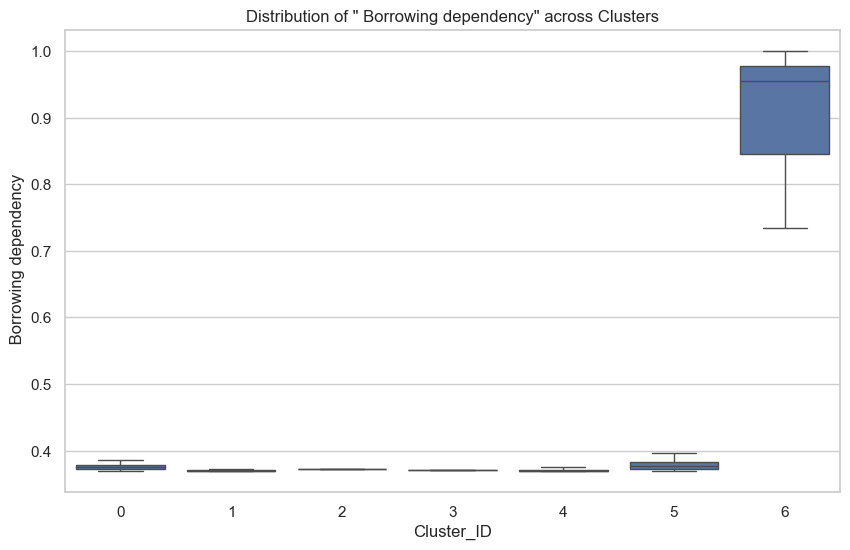

In [47]:
top_feature = top_50_features[0] 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_ID', y=top_feature, data=df, showfliers=False)
plt.title(f'Distribution of "{top_feature}" across Clusters')
plt.show()

### Cluster Prediction Model 

In [48]:
# Training Cluster Predictor 

cluster_predictor = GradientBoostingClassifier(random_state=RANDOM_SEED)
cluster_predictor.fit(X_reduced, cluster_labels)

joblib.dump(cluster_predictor, 'team_cluster_predictor.joblib')
print("Saved 'team_cluster_predictor.joblib'")

Saved 'team_cluster_predictor.joblib'
